# 8.2 Exercise: Time Series Modeling

### Keiuntae Smith
### DSC630 Predictive Analysis
### 26 July 2022

In [73]:
# import libraries
import pandas as pd
import numpy as np
from numpy import sqrt
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.ar_model import AutoReg
from sklearn.metrics import mean_squared_error
from sklearn import metrics
from datetime import datetime

In [60]:
# Load the dataset
df = pd.read_csv('us_retail_sales.csv')

# Preview the dataframe
df.head(5)

,YEAR,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC
0,1992,146925,147223,146805,148032,149010,149800,150761.0,151067.0,152588.0,153521.0,153583.0,155614.0
1,1993,157555,156266,154752,158979,160605,160127,162816.0,162506.0,163258.0,164685.0,166594.0,168161.0
2,1994,167518,169649,172766,173106,172329,174241,174781.0,177295.0,178787.0,180561.0,180703.0,181524.0
3,1995,182413,179488,181013,181686,183536,186081,185431.0,186806.0,187366.0,186565.0,189055.0,190774.0
4,1996,189135,192266,194029,194744,196205,196136,196187.0,196218.0,198859.0,200509.0,200174.0,201284.0


In [61]:
#expand the dataframe 
df_2 = pd.melt(df, id_vars=['YEAR'], var_name="MONTH", value_name="SALES")

In [62]:
#convert months to numerical value
df_2['Month'] = df_2['MONTH'].map({'JAN': 1, 'FEB': 2, 'MAR': 3, 'APR': 4,'MAY':5,'JUN':6,'JUL':7,'AUG':8,'SEP':9,'OCT':10,'NOV':11,'DEC':12})


In [63]:
#create year-month-date conversion
df_2['DATE']=pd.to_datetime(df_2[['YEAR','Month']].assign(DAY=1))

In [64]:
# create dataframe with only needed columns 
df_new = df_2[['DATE','SALES']].sort_values('DATE')
df_new = df_new.dropna()
# preview new dataframe
df_new

,DATE,SALES
0,1992-01-01,146925.0
30,1992-02-01,147223.0
60,1992-03-01,146805.0
90,1992-04-01,148032.0
120,1992-05-01,149010.0
...,...,...
59,2021-02-01,504458.0
89,2021-03-01,559871.0
119,2021-04-01,562269.0
149,2021-05-01,548987.0


## Plot the data with proper labeling and make some observations on the graph.

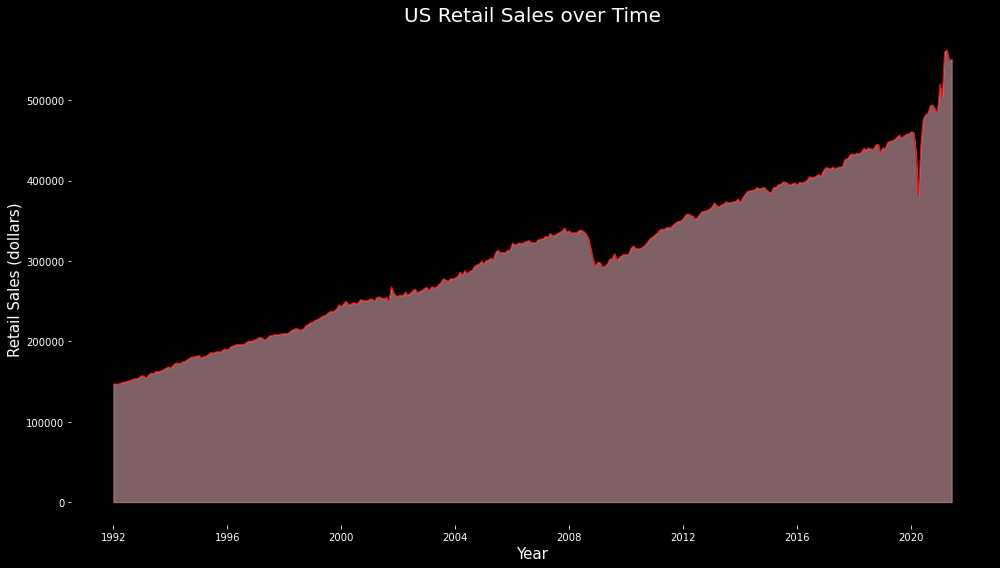

In [65]:
#create an area chart to show Sales vs Date

fig = plt.figure(figsize=(14,8), facecolor='black')
plt.plot(df_new['DATE'], df_new['SALES'], linewidth=1, color='red')
plt.fill_between(df_new['DATE'], df_new['SALES'], color='pink', alpha=0.5)
plt.box(False)

plt.title('US Retail Sales over Time', fontsize=20, color='white')
plt.xlabel('Year', color='white', fontsize=15)
plt.ylabel('Retail Sales (dollars) ', color='white', fontsize=15)
plt.tick_params(axis='x', colors='white')
plt.tick_params(axis='y', colors='white')
plt.tight_layout()
plt.show()

In [66]:
#set the date as the index 
datetime_index = pd.DatetimeIndex(df_new['DATE'].values)
df_new = df_new.set_index(datetime_index)
df_new.drop('DATE', axis=1, inplace=True)

The graph depicts a steady increase in retail revenue each year with an exception of 2008 and 2020.  During the years of 2007 to 2009, the economy was entering a downturn due to the great recession due to lax lending in the mortgage housing market.  In the year of 2020, the Covid-19 Pandemic slowed spending for many due to being in various lockdown situations. 

## Split this data into a training and test set. Use the last year of data (July 2020 – June 2021) of data as your test set and the rest as your training set.

In [67]:
# build the test set
test_set = df_new[df_new.index >= '2020-07-01']
test_set

,SALES
2020-07-01,481627.0
2020-08-01,483716.0
2020-09-01,493327.0
2020-10-01,493991.0
2020-11-01,488652.0
2020-12-01,484782.0
2021-01-01,520162.0
2021-02-01,504458.0
2021-03-01,559871.0
2021-04-01,562269.0


In [68]:
# build the train set
train_set = df_new[df_new.index < '2020-07-01']
train_set

,SALES
1992-01-01,146925.0
1992-02-01,147223.0
1992-03-01,146805.0
1992-04-01,148032.0
1992-05-01,149010.0
...,...
2020-02-01,459610.0
2020-03-01,434281.0
2020-04-01,379892.0
2020-05-01,444631.0


## Use the training set to build a predictive model for the monthly retail sales.

In [69]:
#Instantiate and fit the AR model with training data
ar_model = AutoReg(train_set, lags=3).fit()

/Users/keiuntaesmith/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
/Users/keiuntaesmith/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/ar_model.py:248: FutureWarning: The parameter names will change after 0.12 is released. Set old_names to False to use the new names now. Set old_names to True to use the old names. 
  warnings.warn(


In [70]:
#print summary
print(ar_model.summary())

                            AutoReg Model Results                             
Dep. Variable:                  SALES   No. Observations:                  342
Model:                     AutoReg(3)   Log Likelihood               -3396.835
Method:               Conditional MLE   S.D. of innovations           5438.308
Date:                Tue, 26 Jul 2022   AIC                             17.232
Time:                        21:06:34   BIC                             17.288
Sample:                    04-01-1992   HQIC                            17.254
                         - 06-01-2020                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept   2087.5148   1076.084      1.940      0.052     -21.572    4196.601
SALES.L1       0.8672      0.054     15.942      0.000       0.761       0.974
SALES.L2      -0.3893      0.076     -5.129      0.0

/Users/keiuntaesmith/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:132: FutureWarning: The 'freq' argument in Timestamp is deprecated and will be removed in a future version.
  date_key = Timestamp(key, freq=base_index.freq)


## Use the model to predict the monthly retail sales on the last year of data.

/Users/keiuntaesmith/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/deterministic.py:147: UserWarning: Only PeriodIndexes, DatetimeIndexes with a frequency set, RangesIndexes, and Int64Indexes with a unit increment support extending. The index is set will contain the position relative to the data length.
  warnings.warn(


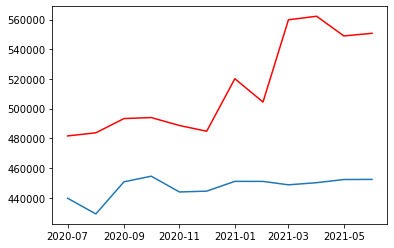

In [71]:
# Make the predictions
pred = ar_model.predict(start=len(train_set), end=(len(df_new)-1), dynamic=False)

# Plot the prediction vs test data
from matplotlib import pyplot
pyplot.plot(pred)
pyplot.plot(test_set, color='red')

## Report the RMSE of the model predictions on the test set.

In [72]:
# Find the square root of the mean of test sales value minus the predict test sales values
rmse = sqrt(mean_squared_error(test_set, pred))
print('Test RMSE is %.3f' % rmse)

Test RMSE is 72691.589


## Conclusion

The unusual high RMSE value signifies that the autoregressive model is not optimal for this exercise. The important value is an indication of how close the predictions are to the actual values. Lower values of RMSE indicate a better fit. RMSE is a worthy measure of how accurately the model predicts the response. It can be the most important criterion for fit if the main purpose of the model is prediction.  An explanation for the gap in prediction and actual could be that there was an unusual spike in sales during the period of prediction time frame. 

